### Convolutional Neural Network

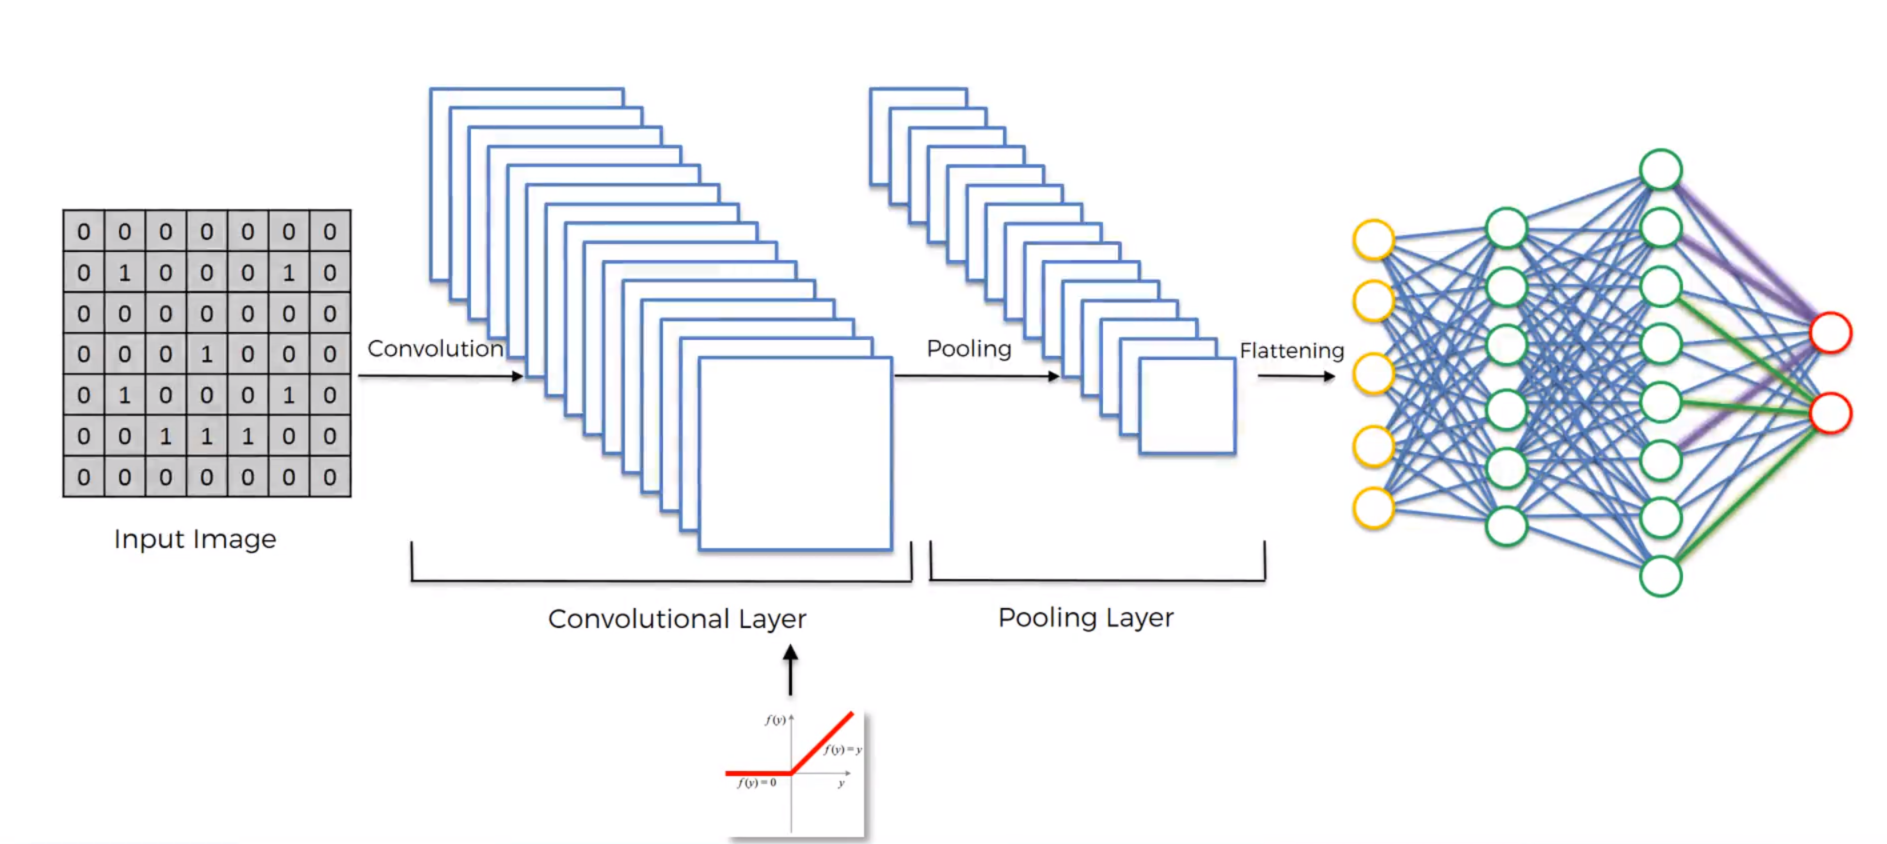

In [1]:
### Data preprocessing
# Data is present in dataset. We have 10000 images. 5000 images of cats and 5000 images of dogs. 
# In that we have 4000 for training and 1000 for test set.

# Part 1 - Building the CNN

In [9]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [10]:
# Initialising the CNN
classifier = Sequential()

In [11]:
# Step 1 - Convolution
classifier.add(Conv2D(32,kernel_size=(3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [12]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [13]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [14]:
# Step 3 - Flattening
classifier.add(Flatten())

In [15]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [16]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Part 2 - Fitting the CNN to the images


In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [19]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [20]:
classifier.fit_generator(training_set,
                         steps_per_epoch=8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps=2000
                         )

Epoch 1/25
8000/8000 [==============================] - 2869s 359ms/step - loss: 0.4093 - acc: 0.8041 - val_loss: 0.4847 - val_acc: 0.8104
Epoch 2/25
8000/8000 [==============================] - 2681s 335ms/step - loss: 0.2230 - acc: 0.9058 - val_loss: 0.5755 - val_acc: 0.8109
Epoch 3/25
8000/8000 [==============================] - 2894s 362ms/step - loss: 0.1435 - acc: 0.9430 - val_loss: 0.7147 - val_acc: 0.8141
Epoch 4/25
8000/8000 [==============================] - 2740s 342ms/step - loss: 0.1026 - acc: 0.9607 - val_loss: 0.7386 - val_acc: 0.8202
Epoch 5/25
8000/8000 [==============================] - 2657s 332ms/step - loss: 0.0822 - acc: 0.9695 - val_loss: 0.8432 - val_acc: 0.8012
Epoch 6/25
1825/8000 [=====>........................] - ETA: 30:43 - loss: 0.0723 - acc: 0.9734

KeyboardInterrupt: 